In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train=pd.read_csv("/content/drive/MyDrive/cab_fare_prediction_ai_challenge-dataset/TRAIN.csv",index_col='index')
test=pd.read_csv("/content/drive/MyDrive/cab_fare_prediction_ai_challenge-dataset/TEST.csv",index_col='index')

In [3]:
df=pd.concat([train,test])

In [4]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit = 'ms')
df["day"]=pd.to_datetime(df.time_stamp).dt.day
df["hour"] = pd.to_datetime(df.time_stamp).dt.hour
df

,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,day,hour
index,,,,,,,,,,
0,2018-11-26 03:40:46.318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0,26,3
1,2018-11-26 03:40:46.319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5,26,3
2,2018-11-26 03:40:46.320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5,26,3
3,2018-11-26 03:40:46.320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5,26,3
4,2018-11-26 03:40:46.320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0,26,3
...,...,...,...,...,...,...,...,...,...,...
24995,2018-11-28 14:01:23.462,Uber,North Station,Fenway,3.05,1.0,UberPool,NaN,28,14
24996,2018-11-28 14:01:23.462,Uber,North Station,Fenway,3.05,1.0,WAV,NaN,28,14
24997,2018-11-28 14:01:23.462,Uber,North Station,Fenway,3.05,1.0,Black SUV,NaN,28,14


In [5]:
df.drop(['time_stamp'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


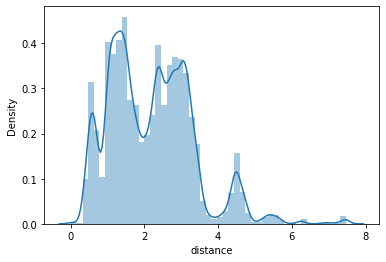

In [6]:
sns.distplot(df['distance'])

In [7]:
cat_cols=list(df.select_dtypes("object"))
cat_cols

['cab_provider', 'source', 'destination', 'cab_type']

In [8]:

cat_data=pd.DataFrame()


In [9]:
for i in range(len(cat_cols)):
    for j in range(len(cat_cols)-1):
        if cat_cols[i]!=cat_cols[j+1]:
            if j>=i:
                #print(cat_cols[i]+"_"+cat_cols[j+1])
                df[[cat_cols[i]+"and"+cat_cols[j+1]]]=df[cat_cols[i]]+"_"+df[cat_cols[j+1]]

In [10]:
df.drop(cat_cols,axis=1,inplace=True)
df

,distance,surge_multiplier,fare,day,hour,cab_providerandsource,cab_provideranddestination,cab_providerandcab_type,sourceanddestination,sourceandcab_type,destinationandcab_type
index,,,,,,,,,,,
0,3.03,1.0,34.0,26,3,Lyft_Boston University,Lyft_Theatre District,Lyft_Lux Black XL,Boston University_Theatre District,Boston University_Lux Black XL,Theatre District_Lux Black XL
1,1.30,1.0,18.5,26,3,Uber_South Station,Uber_Theatre District,Uber_Black,South Station_Theatre District,South Station_Black,Theatre District_Black
2,2.71,1.0,19.5,26,3,Uber_Theatre District,Uber_Fenway,Uber_UberX,Theatre District_Fenway,Theatre District_UberX,Fenway_UberX
3,2.43,1.0,10.5,26,3,Lyft_Northeastern University,Lyft_Beacon Hill,Lyft_Lyft,Northeastern University_Beacon Hill,Northeastern University_Lyft,Beacon Hill_Lyft
4,2.71,1.0,32.0,26,3,Uber_Theatre District,Uber_Fenway,Uber_UberXL,Theatre District_Fenway,Theatre District_UberXL,Fenway_UberXL
...,...,...,...,...,...,...,...,...,...,...,...
24995,3.05,1.0,NaN,28,14,Uber_North Station,Uber_Fenway,Uber_UberPool,North Station_Fenway,North Station_UberPool,Fenway_UberPool
24996,3.05,1.0,NaN,28,14,Uber_North Station,Uber_Fenway,Uber_WAV,North Station_Fenway,North Station_WAV,Fenway_WAV
24997,3.05,1.0,NaN,28,14,Uber_North Station,Uber_Fenway,Uber_Black SUV,North Station_Fenway,North Station_Black SUV,Fenway_Black SUV


In [11]:
df=pd.get_dummies(df)
df

,distance,surge_multiplier,fare,day,hour,cab_providerandsource_Lyft_Back Bay,cab_providerandsource_Lyft_Beacon Hill,cab_providerandsource_Lyft_Boston University,cab_providerandsource_Lyft_Fenway,cab_providerandsource_Lyft_Financial District,cab_providerandsource_Lyft_Haymarket Square,cab_providerandsource_Lyft_North End,cab_providerandsource_Lyft_North Station,cab_providerandsource_Lyft_Northeastern University,cab_providerandsource_Lyft_South Station,cab_providerandsource_Lyft_Theatre District,cab_providerandsource_Lyft_West End,cab_providerandsource_Uber_Back Bay,cab_providerandsource_Uber_Beacon Hill,cab_providerandsource_Uber_Boston University,cab_providerandsource_Uber_Fenway,cab_providerandsource_Uber_Financial District,cab_providerandsource_Uber_Haymarket Square,cab_providerandsource_Uber_North End,cab_providerandsource_Uber_North Station,cab_providerandsource_Uber_Northeastern University,cab_providerandsource_Uber_South Station,cab_providerandsource_Uber_Theatre District,cab_providerandsource_Uber_West End,cab_provideranddestination_Lyft_Back Bay,cab_provideranddestination_Lyft_Beacon Hill,cab_provideranddestination_Lyft_Boston University,cab_provideranddestination_Lyft_Fenway,cab_provideranddestination_Lyft_Financial District,cab_provideranddestination_Lyft_Haymarket Square,cab_provideranddestination_Lyft_North End,cab_provideranddestination_Lyft_North Station,cab_provideranddestination_Lyft_Northeastern University,cab_provideranddestination_Lyft_South Station,cab_provideranddestination_Lyft_Theatre District,...,destinationandcab_type_Northeastern University_UberPool,destinationandcab_type_Northeastern University_UberX,destinationandcab_type_Northeastern University_UberXL,destinationandcab_type_Northeastern University_WAV,destinationandcab_type_South Station_Black,destinationandcab_type_South Station_Black SUV,destinationandcab_type_South Station_Lux,destinationandcab_type_South Station_Lux Black,destinationandcab_type_South Station_Lux Black XL,destinationandcab_type_South Station_Lyft,destinationandcab_type_South Station_Lyft XL,destinationandcab_type_South Station_Shared,destinationandcab_type_South Station_UberPool,destinationandcab_type_South Station_UberX,destinationandcab_type_South Station_UberXL,destinationandcab_type_South Station_WAV,destinationandcab_type_Theatre District_Black,destinationandcab_type_Theatre District_Black SUV,destinationandcab_type_Theatre District_Lux,destinationandcab_type_Theatre District_Lux Black,destinationandcab_type_Theatre District_Lux Black XL,destinationandcab_type_Theatre District_Lyft,destinationandcab_type_Theatre District_Lyft XL,destinationandcab_type_Theatre District_Shared,destinationandcab_type_Theatre District_UberPool,destinationandcab_type_Theatre District_UberX,destinationandcab_type_Theatre District_UberXL,destinationandcab_type_Theatre District_WAV,destinationandcab_type_West End_Black,destinationandcab_type_West End_Black SUV,destinationandcab_type_West End_Lux,destinationandcab_type_West End_Lux Black,destinationandcab_type_West End_Lux Black XL,destinationandcab_type_West End_Lyft,destinationandcab_type_West End_Lyft XL,destinationandcab_type_West End_Shared,destinationandcab_type_West End_UberPool,destinationandcab_type_West End_UberX,destinationandcab_type_West End_UberXL,destinationandcab_type_West End_WAV
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.03,1.0,34.0,26,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.30,1.0,18.5,26,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.71,1.0,19.5,26,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.43,1.0,10.5,26,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [12]:
train=df.iloc[:100000,:]
test=df.iloc[100000:,:]

In [13]:
test.shape

(25000, 425)

In [14]:
X=train.drop('fare',axis=1)
y=train['fare']

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [16]:
X_train ,X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.20,random_state =42)

In [20]:
xgb = XGBRegressor(learning_rate=.3,n_estimators=100,max_depth=6)
xgb.fit(X_train , y_train)


[14:02:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [21]:
import math
pred=xgb.predict(X_train)
print(math.sqrt(mean_squared_error(y_train, pred)))
pred=xgb.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, pred)))

1.5576657739553115
1.645511935521653


In [22]:
test.drop('fare',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
test.shape


(25000, 424)

In [24]:
pred=xgb.predict(test)

In [25]:
test_id=pd.DataFrame(test.index)

In [26]:
submission=pd.concat([test_id,pd.Series(pred,name='fare')],axis=1)
path='/content/drive/MyDrive/cab_fare_prediction_ai_challenge-dataset/submit.csv'
submission.to_csv(path,index=False)

In [27]:
submission

,index,fare
0,0,10.813607
1,1,26.725689
2,2,17.190317
3,3,13.140971
4,4,9.805870
...,...,...
24995,24995,9.949736
24996,24996,10.840421
24997,24997,33.072220
24998,24998,6.741968
